In [2]:
import matplotlib.pyplot as plt
import json
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
from sklearn import metrics
import cv2
import numpy as np
from scipy.ndimage import zoom
from sklearn import datasets


# Cross Validation

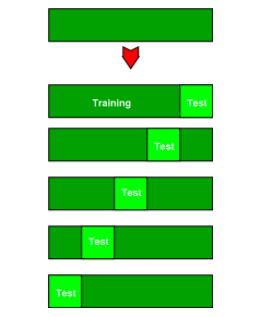

In [3]:
import os
os.getcwd()

'/Users/akash/pychamp_senior/Data_Science'

In [4]:
print ("\n\n Please Wait . . . . .\n\n")

faces = datasets.fetch_olivetti_faces()

# ==========================================================================
# Traverses through the dataset by incrementing index & records the result
# ==========================================================================
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0

    def reset(self):
        print ("============================================")
        print ("Resetting Dataset & Previous Results.. Done!")
        print ("============================================")
        self.results = {}
        self.imgs = faces.images
        self.index = 0

    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                # print self.index
                self.index += 1
            return self.index

    def record_result(self, smile=True):
        print ("Image", self.index + 1, ":", "Happy" if smile is True else "Sad")
        self.results[str(self.index)] = smile





 Please Wait . . . . .




In [5]:
# Trained classifier's performance evaluation
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print ("Scores: ", (scores))
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))


# Confusion Matrix and Results
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [6]:
# ===============================================================================
# from FaceDetectPredict.py
# ===============================================================================

def detectFaces(frame):
#    cascPath = "../data/haarcascade_frontalface_default.xml"
    cascPath = "haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detected_faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=6,
            minSize=(50, 50),
            flags=cv2.CASCADE_SCALE_IMAGE)
    return gray, detected_faces

In [7]:
def extract_face_features(gray, detected_face, offset_coefficients):
    (x, y, w, h) = detected_face
    horizontal_offset = int(offset_coefficients[0] * w)
    vertical_offset = int(offset_coefficients[1] * h)
    extracted_face = gray[y + vertical_offset:y + h,
                     x + horizontal_offset:x - horizontal_offset + w]
    new_extracted_face = zoom(extracted_face, (64. / extracted_face.shape[0],
                                               64. / extracted_face.shape[1]))
    new_extracted_face = new_extracted_face.astype(np.float32)
    new_extracted_face /= float(new_extracted_face.max())
    return new_extracted_face


In [8]:
def predict_face_is_smiling(extracted_face):
    return True if svc_1.predict(extracted_face.reshape(1, -1)) else False

#gray1, face1 = detectFaces(cv2.imread("/Users/akash/emotion_recognition/data/Test3.jpg"))
#gray2, face2 = detectFaces(cv2.imread("/Users/akash/emotion_recognition/data/Test2.jpg"))


def test_recognition(c1, c2):
    extracted_face1 = extract_face_features(gray1, face1[0], (c1, c2))
    print(predict_face_is_smiling(extracted_face1))
    extracted_face2 = extract_face_features(gray2, face2[0], (c1, c2))
    print(predict_face_is_smiling(extracted_face2))
    cv2.imshow('gray1', extracted_face1)
    cv2.imshow('gray2', extracted_face2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Trainer.results  {'344': True, '0': False, '346': True, '347': True, '340': True, '341': True, '342': True, '343': True, '348': True, '349': True, '298': False, '299': False, '296': False, '297': False, '294': True, '295': False, '292': False, '293': False, '290': False, '291': False, '199': True, '198': True, '195': True, '194': True, '197': True, '196': True, '191': True, '190': True, '193': True, '192': True, '270': False, '271': True, '272': False, '273': True, '274': True, '275': False, '276': True, '277': False, '278': True, '279': False, '108': False, '109': False, '102': True, '103': False, '100': True, '101': True, '106': False, '107': False, '104': False, '105': False, '39': False, '38': False, '33': False, '32': False, '31': False, '30': False, '37': False, '36': False, '35': False, '34': False, '339': False, '338': False, '335': False, '334': False, '337': False, '336': True, '331': False, '330': False, '333': False, '332': False, '345': True, '6': False, '99': False, '98':

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass shuffle=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Scores:  [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 0.759 (+/-0.025)
Accuracy on training set:
1.0
Accuracy on testing s

smiling_ratio : 66
Non-smiling ratio 106
smiling_ratio : 66
Non-smiling ratio 107
smiling_ratio : 66
Non-smiling ratio 108
smiling_ratio : 66
Non-smiling ratio 109
smiling_ratio : 66
Non-smiling ratio 110
smiling_ratio : 66
Non-smiling ratio 111
smiling_ratio : 67
Non-smiling ratio 111
smiling_ratio : 68
Non-smiling ratio 111
smiling_ratio : 69
Non-smiling ratio 111
smiling_ratio : 70
Non-smiling ratio 111
smiling_ratio : 70
Non-smiling ratio 112
smiling_ratio : 70
Non-smiling ratio 113
smiling_ratio : 70
Non-smiling ratio 114
smiling_ratio : 71
Non-smiling ratio 114
smiling_ratio : 72
Non-smiling ratio 114
smiling_ratio : 72
Non-smiling ratio 115
smiling_ratio : 73
Non-smiling ratio 115
smiling_ratio : 73
Non-smiling ratio 116
smiling_ratio : 73
Non-smiling ratio 117
smiling_ratio : 73
Non-smiling ratio 118
smiling_ratio : 74
Non-smiling ratio 118
smiling_ratio : 74
Non-smiling ratio 119
smiling_ratio : 75
Non-smiling ratio 119
smiling_ratio : 75
Non-smiling ratio 120
smiling_ratio : 

smiling_ratio : 108
Non-smiling ratio 264
smiling_ratio : 109
Non-smiling ratio 264
smiling_ratio : 110
Non-smiling ratio 264
smiling_ratio : 110
Non-smiling ratio 265
smiling_ratio : 110
Non-smiling ratio 266
smiling_ratio : 110
Non-smiling ratio 267
smiling_ratio : 110
Non-smiling ratio 268
smiling_ratio : 110
Non-smiling ratio 269
smiling_ratio : 110
Non-smiling ratio 270
smiling_ratio : 110
Non-smiling ratio 271
smiling_ratio : 110
Non-smiling ratio 272
smiling_ratio : 110
Non-smiling ratio 273
smiling_ratio : 110
Non-smiling ratio 274
smiling_ratio : 110
Non-smiling ratio 275
smiling_ratio : 110
Non-smiling ratio 276
smiling_ratio : 110
Non-smiling ratio 277
smiling_ratio : 110
Non-smiling ratio 278
smiling_ratio : 110
Non-smiling ratio 279
smiling_ratio : 110
Non-smiling ratio 280
smiling_ratio : 110
Non-smiling ratio 281
smiling_ratio : 110
Non-smiling ratio 282
smiling_ratio : 110
Non-smiling ratio 283
smiling_ratio : 110
Non-smiling ratio 284
smiling_ratio : 110
Non-smiling ra

smiling_ratio : 131
Non-smiling ratio 437
smiling_ratio : 131
Non-smiling ratio 438
smiling_ratio : 132
Non-smiling ratio 438
smiling_ratio : 132
Non-smiling ratio 439
smiling_ratio : 132
Non-smiling ratio 440
smiling_ratio : 132
Non-smiling ratio 441
smiling_ratio : 132
Non-smiling ratio 442
smiling_ratio : 133
Non-smiling ratio 442
smiling_ratio : 134
Non-smiling ratio 442
smiling_ratio : 135
Non-smiling ratio 442
smiling_ratio : 136
Non-smiling ratio 442
smiling_ratio : 137
Non-smiling ratio 442
smiling_ratio : 137
Non-smiling ratio 443
smiling_ratio : 138
Non-smiling ratio 443
smiling_ratio : 139
Non-smiling ratio 443
smiling_ratio : 140
Non-smiling ratio 443
smiling_ratio : 140
Non-smiling ratio 444
smiling_ratio : 141
Non-smiling ratio 444
smiling_ratio : 142
Non-smiling ratio 444
smiling_ratio : 143
Non-smiling ratio 444
smiling_ratio : 143
Non-smiling ratio 445
smiling_ratio : 144
Non-smiling ratio 445
smiling_ratio : 145
Non-smiling ratio 445
smiling_ratio : 146
Non-smiling ra

smiling_ratio : 270
Non-smiling ratio 494
smiling_ratio : 271
Non-smiling ratio 494
smiling_ratio : 272
Non-smiling ratio 494
smiling_ratio : 273
Non-smiling ratio 494
smiling_ratio : 273
Non-smiling ratio 495
smiling_ratio : 274
Non-smiling ratio 495
smiling_ratio : 275
Non-smiling ratio 495
smiling_ratio : 276
Non-smiling ratio 495
smiling_ratio : 277
Non-smiling ratio 495
smiling_ratio : 278
Non-smiling ratio 495
smiling_ratio : 278
Non-smiling ratio 496
smiling_ratio : 279
Non-smiling ratio 496
smiling_ratio : 280
Non-smiling ratio 496
smiling_ratio : 280
Non-smiling ratio 497
smiling_ratio : 281
Non-smiling ratio 497
smiling_ratio : 282
Non-smiling ratio 497
smiling_ratio : 283
Non-smiling ratio 497
smiling_ratio : 284
Non-smiling ratio 497
smiling_ratio : 285
Non-smiling ratio 497
smiling_ratio : 285
Non-smiling ratio 498
smiling_ratio : 285
Non-smiling ratio 499
smiling_ratio : 285
Non-smiling ratio 500
smiling_ratio : 286
Non-smiling ratio 500
smiling_ratio : 287
Non-smiling ra

smiling_ratio : 338
Non-smiling ratio 622
smiling_ratio : 338
Non-smiling ratio 623
smiling_ratio : 338
Non-smiling ratio 624
smiling_ratio : 338
Non-smiling ratio 625
smiling_ratio : 338
Non-smiling ratio 626
smiling_ratio : 338
Non-smiling ratio 627
smiling_ratio : 338
Non-smiling ratio 628
smiling_ratio : 338
Non-smiling ratio 629
smiling_ratio : 338
Non-smiling ratio 630
smiling_ratio : 338
Non-smiling ratio 631
smiling_ratio : 338
Non-smiling ratio 632
smiling_ratio : 338
Non-smiling ratio 633
smiling_ratio : 338
Non-smiling ratio 634
smiling_ratio : 338
Non-smiling ratio 635
smiling_ratio : 338
Non-smiling ratio 636
smiling_ratio : 338
Non-smiling ratio 637
smiling_ratio : 338
Non-smiling ratio 638
smiling_ratio : 338
Non-smiling ratio 639
smiling_ratio : 338
Non-smiling ratio 640
smiling_ratio : 338
Non-smiling ratio 641
smiling_ratio : 338
Non-smiling ratio 642
smiling_ratio : 338
Non-smiling ratio 643
smiling_ratio : 338
Non-smiling ratio 644
smiling_ratio : 338
Non-smiling ra

smiling_ratio : 424
Non-smiling ratio 731
smiling_ratio : 424
Non-smiling ratio 732
smiling_ratio : 424
Non-smiling ratio 733
smiling_ratio : 425
Non-smiling ratio 733
smiling_ratio : 425
Non-smiling ratio 733
smiling_ratio : 425
Non-smiling ratio 733
smiling_ratio : 425
Non-smiling ratio 733
smiling_ratio : 426
Non-smiling ratio 733
smiling_ratio : 427
Non-smiling ratio 733
smiling_ratio : 428
Non-smiling ratio 733
smiling_ratio : 429
Non-smiling ratio 733
smiling_ratio : 430
Non-smiling ratio 733
smiling_ratio : 431
Non-smiling ratio 733
smiling_ratio : 432
Non-smiling ratio 733
smiling_ratio : 433
Non-smiling ratio 733
smiling_ratio : 434
Non-smiling ratio 733
smiling_ratio : 435
Non-smiling ratio 733
smiling_ratio : 436
Non-smiling ratio 733
smiling_ratio : 437
Non-smiling ratio 733
smiling_ratio : 438
Non-smiling ratio 733
smiling_ratio : 439
Non-smiling ratio 733
smiling_ratio : 439
Non-smiling ratio 734
smiling_ratio : 439
Non-smiling ratio 735
smiling_ratio : 440
Non-smiling ra

smiling_ratio : 490
Non-smiling ratio 859
smiling_ratio : 490
Non-smiling ratio 860
smiling_ratio : 490
Non-smiling ratio 861
smiling_ratio : 490
Non-smiling ratio 862
smiling_ratio : 491
Non-smiling ratio 862
smiling_ratio : 492
Non-smiling ratio 862
smiling_ratio : 492
Non-smiling ratio 863
smiling_ratio : 492
Non-smiling ratio 864
smiling_ratio : 493
Non-smiling ratio 864
smiling_ratio : 493
Non-smiling ratio 865
smiling_ratio : 493
Non-smiling ratio 866
smiling_ratio : 493
Non-smiling ratio 867
smiling_ratio : 493
Non-smiling ratio 868
smiling_ratio : 493
Non-smiling ratio 869
smiling_ratio : 493
Non-smiling ratio 870
smiling_ratio : 493
Non-smiling ratio 871
smiling_ratio : 494
Non-smiling ratio 871
smiling_ratio : 494
Non-smiling ratio 872
smiling_ratio : 494
Non-smiling ratio 873
smiling_ratio : 494
Non-smiling ratio 873
smiling_ratio : 494
Non-smiling ratio 873
smiling_ratio : 494
Non-smiling ratio 873
smiling_ratio : 494
Non-smiling ratio 873
smiling_ratio : 494
Non-smiling ra

smiling_ratio : 530
Non-smiling ratio 997
smiling_ratio : 530
Non-smiling ratio 998
smiling_ratio : 530
Non-smiling ratio 999
smiling_ratio : 530
Non-smiling ratio 1000
smiling_ratio : 531
Non-smiling ratio 1000
smiling_ratio : 531
Non-smiling ratio 1001
smiling_ratio : 531
Non-smiling ratio 1002
smiling_ratio : 531
Non-smiling ratio 1003
smiling_ratio : 531
Non-smiling ratio 1004
smiling_ratio : 531
Non-smiling ratio 1005
smiling_ratio : 531
Non-smiling ratio 1006
smiling_ratio : 531
Non-smiling ratio 1007
smiling_ratio : 531
Non-smiling ratio 1008
smiling_ratio : 531
Non-smiling ratio 1009
smiling_ratio : 531
Non-smiling ratio 1010
smiling_ratio : 531
Non-smiling ratio 1011
smiling_ratio : 531
Non-smiling ratio 1012
smiling_ratio : 531
Non-smiling ratio 1013
smiling_ratio : 531
Non-smiling ratio 1014
smiling_ratio : 531
Non-smiling ratio 1015
smiling_ratio : 531
Non-smiling ratio 1016
smiling_ratio : 531
Non-smiling ratio 1017
smiling_ratio : 532
Non-smiling ratio 1017
smiling_ratio 

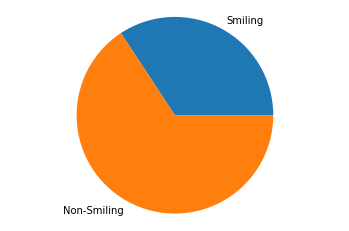

NameError: name 'out' is not defined

In [9]:
if __name__ == "__main__":

    smile = 0
    no_smile = 0
    svc_1 = SVC(kernel='linear')  # Initializing Classifier

    trainer = Trainer()
    results = json.load(open("results.xml"))  # Loading the classification result
    trainer.results = results
    print ("Trainer.results ", trainer.results)
    indices = [int(i) for i in trainer.results]  # Building the dataset now
    data = faces.data[indices, :]  # Image Data

    target = [trainer.results[i] for i in trainer.results]  # Target Vector
    target = np.array(target).astype(np.int32)

    # Train the classifier using 5 fold cross validation
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

    # Trained classifier's performance evaluation
    evaluate_cross_validation(svc_1, X_train, y_train, True)

    # Confusion Matrix and Results
    train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

    video_capture = cv2.VideoCapture(0)
#    video_capture = cv2.VideoCapture('video1.mp4')
#    fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
#    out = cv2.VideoWriter('ak_recording.m4v', fourcc, 30.0, (640,480))
#    while True:
    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()
        frame = cv2.resize(frame, (640,480))
        # detect faces
        gray, detected_faces = detectFaces(frame)

        face_index = 0

        cv2.putText(frame, "Press Esc to QUIT", (15, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

        # predict output
        for face in detected_faces:
            (x, y, w, h) = face
            if w > 100:
                # draw rectangle around face
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

                # extract features
                extracted_face = extract_face_features(gray, face, (0.3, 0.05)) #(0.075, 0.05)

                # predict smile
                prediction_result = predict_face_is_smiling(extracted_face)

                # draw extracted face in the top right corner
                frame[face_index * 64: (face_index + 1) * 64, -65:-1, :] = cv2.cvtColor(extracted_face * 255, cv2.COLOR_GRAY2RGB)                

                # annotate main image with a label
                if prediction_result is True:
                    cv2.putText(frame, "SMILING",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 5)
                    flag = True
#                    length1 = int(out.get(cv2.CAP_PROP_FRAME_COUNT))
#                    print("length1 :", length1)
                else:
                    cv2.putText(frame, "Not Smiling",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, 155, 5)
#                    length2 = int(out.get(cv2.CAP_PROP_FRAME_COUNT))
#                    print("length2 :", length2)
                    flag = False
                # increment counter
                face_index += 1
                if flag == True:
                    smile = smile + 1
                else:
                    no_smile = no_smile + 1
                    
#                out.write(frame)
        print("smiling_ratio :", smile)
        print("Non-smiling ratio", no_smile)
     # Display the resulting frame
        cv2.imshow('Video', frame)
        if cv2.waitKey(10) & 0xFF == 27:
                break


    labels = ['Smiling', 'Non-Smiling']
    values = [smile, no_smile]
    plt.pie(values, labels = labels)
    plt.axis('equal')
    plt.show()
    # When everything is done, release the capture
    video_capture.release()
    out.release()
    #cv2.destroyAllWindows()